In [315]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

assert sklearn.__version__ >= "1.0.1"
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

### 와인 데이터를 분류할 수있는 모델을 만들어 봅시다.
- 클래시파잉 모델로
- 회귀 모델로
- 클러스터링 모델로
- feature importance도 확인해보기, 중요하지 않거나 이상한 것은 제거하거나 가중치를 줄여보기 가능
- 과적합을 막기 위해 feature를 다 쓰지 않고 차원 축소를 하거나 적당히 골라서  feature를 사용하자

In [316]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [317]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [318]:
wine_df['target'] = wine.target

In [319]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [320]:
wine_df['alcohol'] 

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [321]:
wine_df['color_intensity']

0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name: color_intensity, Length: 178, dtype: float64

<Axes: xlabel='alcohol', ylabel='color_intensity'>

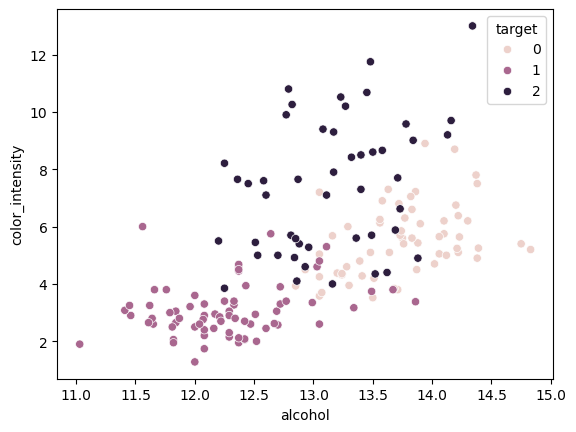

In [322]:
sns.scatterplot(data=wine_df,x=wine_df['alcohol'], y=wine_df['color_intensity'], hue=wine_df['target'])

In [323]:
wine_df = pd.DataFrame(wine_df[['alcohol','color_intensity','target']]).dropna(axis=1)

In [324]:
wine_df

,alcohol,color_intensity,target
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,7.80,0
4,13.24,4.32,0
...,...,...,...
173,13.71,7.70,2
174,13.40,7.30,2
175,13.27,10.20,2
176,13.17,9.30,2


In [325]:
X = wine_df[["alcohol", "color_intensity"]].values
y = wine_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [326]:
softmax_reg.score(X_train, y_train)

0.8120300751879699

In [327]:
softmax_reg.score(X_test, y_test)

0.8888888888888888

In [328]:
softmax_reg.predict_proba([[16, -1]]).round(2)

array([[0.67, 0.33, 0.  ]])

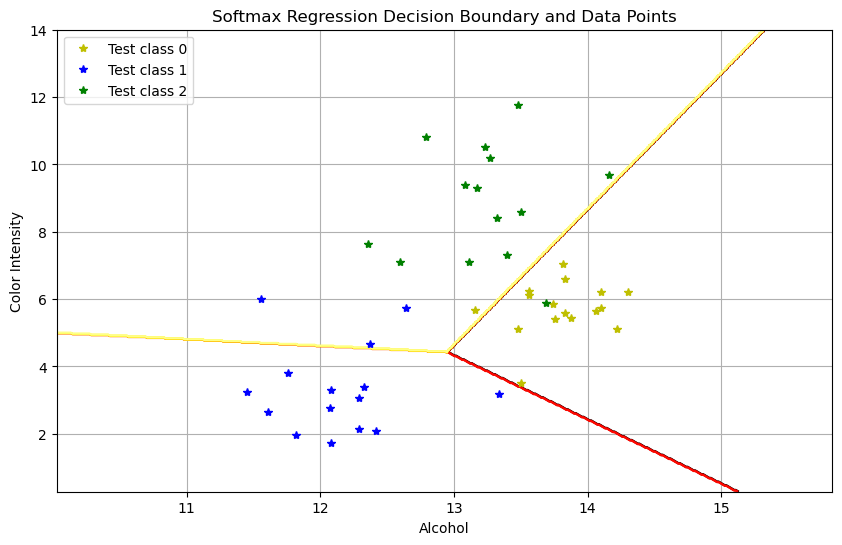

In [330]:
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500).reshape(-1, 1),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# 결정 경계 그리기
zz = y_predict.reshape(x0.shape)
plt.figure(figsize=(10, 6))
# plt.contourf(x0, x1, zz, alpha=0.3, cmap="coolwarm")
contour = plt.contour(x0, x1, zz, cmap="hot")

# 훈련 세트 및 테스트 세트 시각화
# plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "yo", label="Train class 0")
# plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "bs", label="Train class 1")
# plt.plot(X_train[y_train == 2, 0], X_train[y_train == 2, 1], "g^", label="Train class 2")

plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], "y*", label="Test class 0")
plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], "b*", label="Test class 1")
plt.plot(X_test[y_test == 2, 0], X_test[y_test == 2, 1], "g*", label="Test class 2")


plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.legend(loc="upper left")
plt.title("Softmax Regression Decision Boundary and Data Points")
plt.grid()
plt.show()